Gerekli kütüphanler yüklendi

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Görüntüler yüklenerek ve belirli bir boyuta yeniden boyutlandırılarak bir veri seti olsuturuldu.

In [13]:
dir = 'raw-img'
classes = ['cane', 'cavallo', 'elefante',  'farfalla',  'female' , 'gallina', 'gatto','male', 'mucca', 'pecora', 'ragno', 'random' ,'scoiattolo']
dataset = []
for cl in classes:
    cls_num = classes.index(cl)
    path = os.path.join(dir, cl)
    sayac = 0
    for img in os.listdir(path):
        sayac += 1
        if sayac == 300:
            break
        try:
            img = cv2.imread(os.path.join(path, img))
            resized_img = cv2.resize(img, (224,224))
            dataset.append([resized_img, cls_num])
        except Exception as e:
            pass

libpng warning: iCCP: known incorrect sRGB profile


In [14]:
x =  []
y =  []
for pic, label in dataset:
    x.append(pic)
    y.append(label)

In [15]:
x = np.array(x)

In [16]:
y = np.array(y)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3108, 224, 224, 3) (777, 224, 224, 3) (3108,) (777,)


In [19]:
translate = ["dog", "horse", "elephant", "butterfly", 'female' ,"chicken", "cat", 'male',"cow", "sheep", "spider", "other","squirrel"]

In [20]:
def img_show(pic, label, index):
    plt.figure(figsize=(15,2))
    plt.imshow(pic[index])
    plt.xlabel(translate[label[index]], fontsize=10)

In [21]:
IMAGE_SHAPE = [224, 224]

In [97]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.keras.applications import VGG16

# Define your image shape
IMAGE_SHAPE = (224, 224)

# Instantiate VGG16 model with pre-trained weights
vgg = VGG16(input_shape=IMAGE_SHAPE + (3,), weights='imagenet', include_top=False)


In [98]:
for layer in vgg.layers:
    layer.trainable = False

In [103]:
x = Flatten()(vgg.output)
predictions = Dense(13, activation='softmax')(x)

In [104]:
model = Model(inputs = vgg.input, outputs = predictions)

In [105]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.6312 - loss: 14.0574
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.9397 - loss: 2.1215
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - accuracy: 0.9868 - loss: 0.4053
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.9911 - loss: 0.1515
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.9842 - loss: 0.5101


In [107]:
model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.8820 - loss: 7.3794


[7.688664436340332, 0.8688945770263672]

In [108]:
p = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step


In [110]:
translate[np.argmax(p[0])]

'spider'

In [112]:
model.save('animal-10.hdf5')

In [4]:
translate = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]

ValueError: No model config found in the file at model.weights.h5.

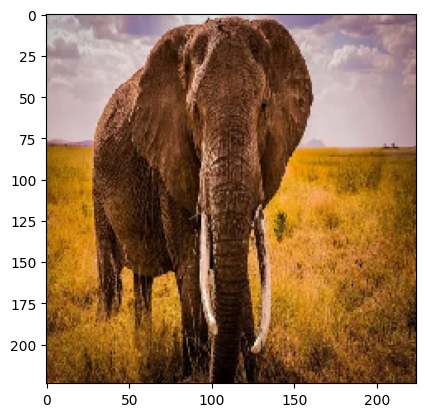

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
img6 = image.load_img('WhatsApp Image 2024-04-20 at 13.35.24.jpeg', target_size= (224, 224))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = np.expand_dims(img6,axis=0)
model = load_model('model.weights.h5')
result_sp = model.predict(img6)
translate[np.argmax(result_sp[0])]

In [4]:
import cv2

# Görüntüyü yükle
image = cv2.imread('WhatsApp Image 2024-04-20 at 13.35.24.jpeg')

# ROI koordinatlarını belirle
x, y, w, h = 100, 100, 200, 200  # Örnek koordinatlar (x,y: sol üst köşenin koordinatları, w: genişlik, h: yükseklik)

# ROI'yi al
roi = image[y:y+h, x:x+w]

# ROI'yi göster
cv2.imshow('ROI', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()


2024-04-22 14:06:26.421 Python[1457:14610] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


: 